In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [2]:
data = pd.read_parquet('data/full_data.parquet')
data.head(10)

,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.05,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
5,1672911588220,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
6,1672911588230,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
7,1672911588240,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
8,1672911588250,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997
9,1672911588260,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997


In [3]:
data = data.reset_index()
data.drop(['index'],1,inplace=True)
print('Before removing duplicates data shape: ',data.shape)
data = data.drop_duplicates(subset = ['rtctime'], keep = 'first')
print('After removing duplicates data shape: ',data.shape)
data = data.sort_values(by = 'rtctime', ascending = True)
data = data.reset_index()
data.drop(['index'],1,inplace=True)
data.head(10)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Before removing duplicates data shape:  (8159719, 10)
After removing duplicates data shape:  (8156409, 10)


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.05,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
5,1672911588220,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
6,1672911588230,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
7,1672911588240,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
8,1672911588250,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997
9,1672911588260,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997


In [4]:
data = data.drop(['rtctime','lat','lon'],1)
data.columns

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Index(['target_temperature', 'feature_c', 'feature_ct', 'feature_motorspeed',
       'ambient_temp', 'car_speed', 'soc'],
      dtype='object')

In [5]:
copy_data = data.copy()

In [29]:
data_diff = data.rolling(window=7, min_periods=7).mean()
data_diff = data_diff[7:]
data_diff.head(10)

,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
7,-4.281718,21.242899,-1.0,70.209059,-3.9,1.084286,84.199997
8,-4.281718,21.197426,-1.0,70.731707,-3.9,1.101429,84.199997
9,-4.281718,21.151953,-1.0,71.254355,-3.9,1.118571,84.199997
10,-4.281718,21.047366,-1.0,71.515679,-3.9,1.135714,84.199997
11,-4.281718,20.942778,-1.0,71.777003,-3.9,1.144286,84.199997
12,-4.281718,20.838190,-1.0,72.038328,-3.9,1.160000,84.199997
13,-4.281718,20.783623,-1.0,72.560976,-3.9,1.175714,84.199997
14,-4.281718,20.729055,-1.0,73.083624,-3.9,1.191429,84.199997
15,-4.281718,20.779076,-1.0,73.344948,-3.9,1.198571,84.199997
16,-4.281718,20.829096,-1.0,73.606272,-3.9,1.212857,84.199997


In [30]:
data_diff.iloc[20:50]

,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
27,-4.281718,20.656300,-1.0,78.919861,-3.9,1.328571,84.199997
28,-4.281718,20.592638,-1.0,79.529617,-3.9,1.341429,84.199997
29,-4.281718,20.528976,-1.0,80.139373,-3.9,1.354286,84.199997
30,-4.281718,20.510786,-1.0,80.574913,-3.9,1.367143,84.199997
31,-4.281718,20.492597,-1.0,81.010453,-3.9,1.372857,84.199997
32,-4.281718,20.474408,-1.0,81.445993,-3.9,1.381429,84.199997
33,-4.281718,20.474408,-1.0,82.491289,-3.9,1.390000,84.199997
34,-4.281718,20.474408,-1.0,83.536585,-3.9,1.398571,84.199997
35,-4.281718,20.492597,-1.0,84.146341,-3.9,1.401429,84.199997
36,-4.281718,20.510786,-1.0,84.756098,-3.9,1.411429,84.199997


In [31]:
data_diff = data_diff.reset_index()

C:\Users\Yash\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:839: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\Yash\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Yash\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


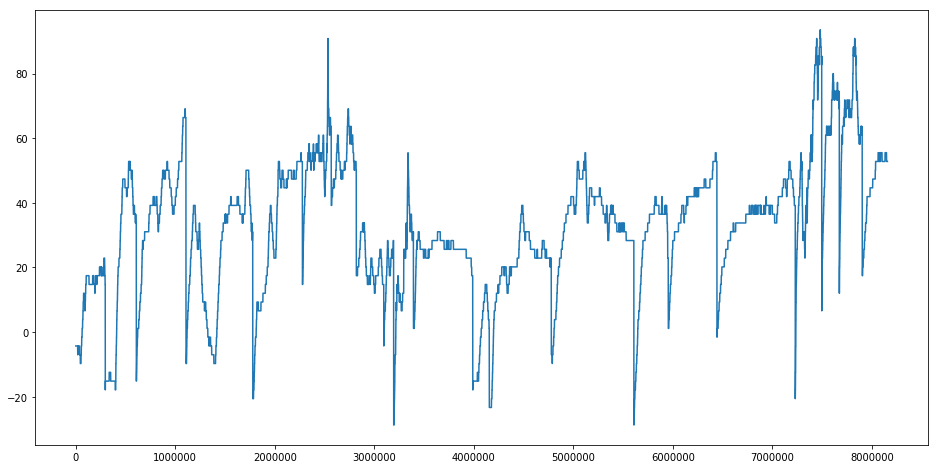

In [48]:
plt.figure(figsize = (16,8))
plt.plot(data_diff.index, data_diff.target_temperature)
plt.show()

In [6]:
X = data.drop(['target_temperature'],1)
y = data['target_temperature']
print('Independent features shape: ', X.shape, 'Target variable shape: ', y.shape)

Independent features shape:  (8156409, 6) Target variable shape:  (8156409,)


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
for i in range(0,len(X),100):
    X.iloc[i] = X.iloc[i] * 0.75
    
X.iloc[200]
# print(data.iloc[100])
# data.iloc[100] = data.iloc[100]*0.1
# data.iloc[100]

feature_c              13.920000
feature_ct             -0.750000
feature_motorspeed    118.902439
ambient_temp           -2.850000
car_speed               2.280000
soc                    63.149998
Name: 200, dtype: float64

In [8]:
data.iloc[200]

target_temperature     -4.281718
feature_c              18.560001
feature_ct             -1.000000
feature_motorspeed    158.536585
ambient_temp           -3.800000
car_speed               3.040000
soc                    84.199997
Name: 200, dtype: float64

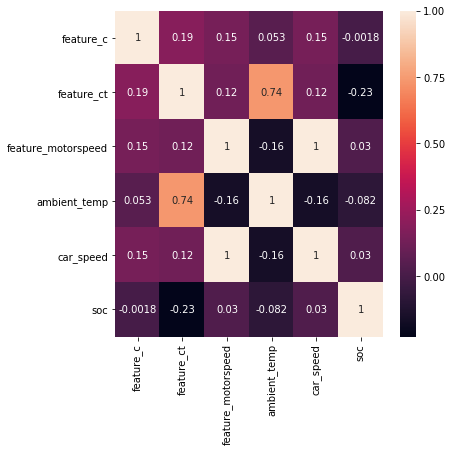

In [9]:
feature_corr = X.corr()
plt.figure(figsize=(6,6))
sns.heatmap(feature_corr, annot = True)
plt.show()

In [10]:
# std_scaler = StandardScaler()
# X_scaled = std_scaler.fit_transform(X)
# X_scaled

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5709486, 6) (2446923, 6) (5709486,) (2446923,)


RANDOM FOREST REGRESSOR

In [12]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=5)
rfr_model = rfr.fit(X_train, y_train)
rfr_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
y_pred = rfr_model.predict(X_test)
print("R2 Score: ",np.round(r2_score(y_test, y_pred),2))
print("Error: ", np.round(mean_squared_error(y_test, y_pred),2))

R2 Score:  0.8
Error:  79.0


In [14]:
rfr_model_file = "models/rfr_model_noisy.joblib"
joblib.dump(rfr_model, rfr_model_file)

['models/rfr_model_noisy.joblib']

In [24]:
rfr_model_load = joblib.load('models/rfr_model.sav')
val_pred = rfr_model_load.predict(X_test)
print("R2 Score: ",np.round(r2_score(y_test, val_pred),2))
print("Error: ", np.round(mean_squared_error(y_test, val_pred),2))

R2 Score:  0.8
Error:  76.94


In [15]:
feature_importances = rfr_model.feature_importances_
column_names = X.columns
feature_names = {'importance':feature_importances, 'column':column_names}
feature_names = pd.DataFrame(feature_names)
feature_names

,importance,column
0,0.000000,feature_c
1,0.630249,feature_ct
2,0.031115,feature_motorspeed
3,0.072236,ambient_temp
4,0.186691,car_speed
5,0.079709,soc


GRADIENT BOOSTING REGRESSOR

In [16]:
gbr = GradientBoostingRegressor(n_estimators = 50, max_depth = 5)
gbr_model = gbr.fit(X_train, y_train)
gbr_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
y_pred = gbr_model.predict(X_test)
print("R2 Score: ",np.round(r2_score(y_test, y_pred),2))
print("Error: ", np.round(mean_squared_error(y_test, y_pred),2))

R2 Score:  0.92
Error:  30.68


In [18]:
feature_importances = gbr_model.feature_importances_
column_names = X.columns
feature_names = {'importance':feature_importances, 'column':column_names}
feature_names = pd.DataFrame(feature_names)
feature_names

,importance,column
0,0.002340,feature_c
1,0.561214,feature_ct
2,0.019601,feature_motorspeed
3,0.114748,ambient_temp
4,0.185637,car_speed
5,0.116460,soc


In [19]:
gbr_model_file = "models/gbr_model_noisy.joblib"
joblib.dump(gbr_model, gbr_model_file)

['models/gbr_model_noisy.joblib']

In [30]:
joblib.__version__

'1.2.0'